In [233]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt

In [234]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [235]:
tf.test.is_gpu_available(
    cuda_only=True, min_cuda_compute_capability=None
)

False

In [236]:
data = pd.read_csv(r'C:\Users\Patel\OneDrive\Desktop\Work\simple neural net\train.csv')

In [237]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [238]:
data.shape

(1000, 12)

In [239]:
#sns.pairplot(data[['v.id', 'on road old', 'on road now', 'years', 'km', 'rating','condition', 'economy', 'top speed', 'hp', 'torque', 'current price']])

In [240]:
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [241]:
#making tensor
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [242]:
#suffle data
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[7.070000e+02 5.707810e+05 8.668300e+05 ... 8.900000e+01 1.340000e+02
  3.523450e+05]
 [9.040000e+02 6.102460e+05 8.670490e+05 ... 5.800000e+01 9.500000e+01
  1.709605e+05]
 [4.210000e+02 5.522800e+05 8.982900e+05 ... 5.700000e+01 7.200000e+01
  2.074805e+05]
 ...
 [3.970000e+02 6.290810e+05 8.358600e+05 ... 8.900000e+01 1.020000e+02
  3.035065e+05]
 [9.870000e+02 6.040120e+05 7.810100e+05 ... 1.020000e+02 1.370000e+02
  2.096390e+05]
 [8.000000e+00 6.629900e+05 8.915690e+05 ... 1.090000e+02 9.600000e+01
  4.674715e+05]], shape=(1000, 12), dtype=float32)


In [243]:
x = tensor_data[:,3:-1]
x.shape

TensorShape([1000, 8])

In [244]:
y = tensor_data[:,-1]
y.shape


TensorShape([1000])

In [245]:
y = tf.expand_dims(y,axis=1)
y[:5].shape

TensorShape([5, 1])

In [246]:
#testing function manually
norm = Normalization(mean = 5,variance = 4)
samplex = tf.constant([[1,2,3,4],[2,3,4,5],[32,12,32,45]])
norm(samplex)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-2. , -1.5, -1. , -0.5],
       [-1.5, -1. , -0.5,  0. ],
       [13.5,  3.5, 13.5, 20. ]], dtype=float32)>

In [247]:
#let function decice the values
autonorm = Normalization()
autonorm.adapt(samplex)
autonorm(samplex)


<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.7415837 , -0.8153742 , -0.7439795 , -0.73312837],
       [-0.67206025, -0.5929994 , -0.6695816 , -0.68076205],
       [ 1.4136438 ,  1.4083737 ,  1.4135611 ,  1.4138904 ]],
      dtype=float32)>

In [248]:
#all testing done now lets get on real data
x[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[4.00000e+00, 9.56470e+04, 2.00000e+00, 8.00000e+00, 8.00000e+00,
        1.92000e+02, 8.90000e+01, 1.34000e+02],
       [5.00000e+00, 1.45711e+05, 3.00000e+00, 8.00000e+00, 9.00000e+00,
        1.94000e+02, 5.80000e+01, 9.50000e+01],
       [2.00000e+00, 1.29891e+05, 5.00000e+00, 2.00000e+00, 1.10000e+01,
        1.44000e+02, 5.70000e+01, 7.20000e+01],
       [2.00000e+00, 5.56900e+04, 4.00000e+00, 5.00000e+00, 1.10000e+01,
        1.90000e+02, 8.30000e+01, 1.06000e+02],
       [6.00000e+00, 1.35163e+05, 3.00000e+00, 4.00000e+00, 1.10000e+01,
        1.88000e+02, 7.00000e+01, 1.06000e+02]], dtype=float32)>

In [249]:
autonorm = Normalization()
autonorm.adapt(x)
x = autonorm(x)


In [250]:
train = 0.8
val = 0.1
test = 0.1
size = len(x)

In [251]:
xtrain = x[:int(size * train)]
ytrain = y[:int(size * train)]
xtrain.shape,ytrain.shape
int(size * train)

800

In [252]:
train_data = tf.data.Dataset.from_tensor_slices((xtrain,ytrain))
train_data =train_data.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [253]:
xval = x[int(size * train):int(size * (train+val))]
yval = y[int(size * train):int(size * (train+val))]
xval.shape,yval.shape
int(size * train),int(size * (train+val))

(800, 900)

In [254]:
val_data = tf.data.Dataset.from_tensor_slices((xval,yval))
val_data = val_data.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [255]:
xtest = x[int(size * (train+val)):]
ytest = y[int(size * (train+val)):]
xtest.shape,ytest.shape

(TensorShape([100, 8]), TensorShape([100, 1]))

In [256]:
test_data = tf.data.Dataset.from_tensor_slices((xtest,ytest))
test_data = test_data.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [257]:
model = tf.keras.Sequential(
    [
        InputLayer(input_shape = (8,)),
        autonorm,
        Dense(128,activation = 'relu'),
        Dense(128,activation = 'relu'),
        Dense(128,activation = 'relu'),
        Dense(1)
    ]
)
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_14 (Normaliz  (None, 8)                 17        
 ation)                                                          
                                                                 
 dense_27 (Dense)            (None, 128)               1152      
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
_____________

In [258]:
tf.keras.utils.plot_model(model,to_file = 'model.png',show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [259]:
model.compile(loss = MeanAbsoluteError(),optimizer=Adam(learning_rate = 0.1),metrics=RootMeanSquaredError())

In [260]:
history = model.fit(train_data,epochs = 100,verbose = 1,validation_data = val_data)

Epoch 1/100
25/25 [==============================] - 2s 13ms/step - loss: 173848.6875 - root_mean_squared_error: 213645.4219 - val_loss: 113322.1562 - val_root_mean_squared_error: 133792.8281
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 109613.5938 - root_mean_squared_error: 130272.0000 - val_loss: 111114.1172 - val_root_mean_squared_error: 131378.5781
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 114215.4766 - root_mean_squared_error: 137065.0312 - val_loss: 113007.6016 - val_root_mean_squared_error: 135726.3594
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 114239.0703 - root_mean_squared_error: 138796.6406 - val_loss: 110772.6562 - val_root_mean_squared_error: 130624.6797
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 110640.4297 - root_mean_squared_error: 133798.5156 - val_loss: 111710.0391 - val_root_mean_squared_error: 131892.5625
Epoch 6/100
25/25 [=========================

In [261]:
history.history

{'loss': [173848.6875,
  109613.59375,
  114215.4765625,
  114239.0703125,
  110640.4296875,
  109470.3515625,
  110702.4921875,
  108971.03125,
  112376.2421875,
  111250.109375,
  109212.0,
  114732.203125,
  108509.6171875,
  108250.8984375,
  110582.203125,
  110860.9609375,
  109074.6796875,
  111825.0234375,
  108914.6875,
  109590.578125,
  112159.5,
  108173.171875,
  111497.140625,
  109466.5078125,
  108388.1875,
  107886.1328125,
  109243.7734375,
  108415.3203125,
  108540.7578125,
  113511.7734375,
  109106.9765625,
  110134.1875,
  107667.5234375,
  110752.609375,
  109391.046875,
  109747.65625,
  109489.421875,
  109839.0703125,
  109439.453125,
  107841.828125,
  109125.1796875,
  109971.53125,
  109630.0625,
  108651.25,
  109547.1796875,
  110013.7890625,
  110658.5625,
  108425.3828125,
  109354.46875,
  108276.71875,
  108704.7421875,
  109550.1875,
  109445.9765625,
  109401.90625,
  109888.796875,
  109181.078125,
  110777.9609375,
  112660.7421875,
  109306.3984

In [262]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

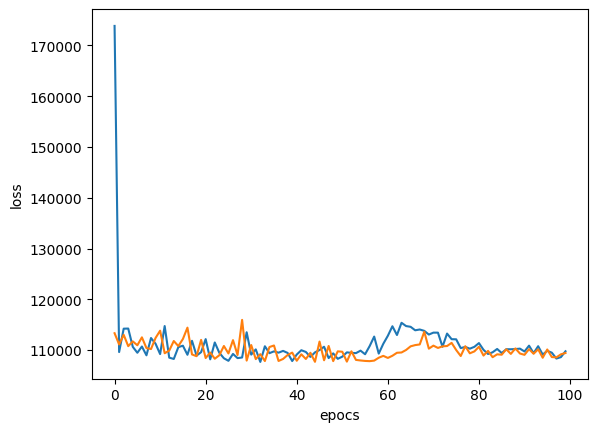

In [263]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epocs')
plt.ylabel('loss')
plt.show()

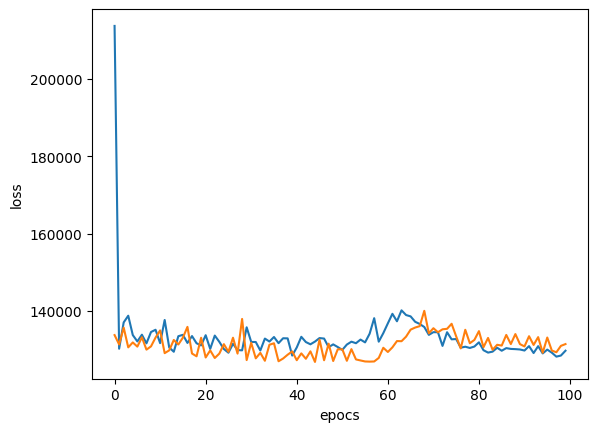

In [264]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.xlabel('epocs')
plt.ylabel('loss')
plt.show()

In [265]:
model.evaluate(xtest,ytest)

4/4 [==============================] - 0s 3ms/step - loss: 98184.0234 - root_mean_squared_error: 116203.9609


[98184.0234375, 116203.9609375]

In [266]:
model.predict(xtest)

4/4 [==============================] - 0s 2ms/step


array([[286341.28],
       [258507.1 ],
       [263496.66],
       [295809.06],
       [297725.7 ],
       [275003.66],
       [311399.78],
       [291509.03],
       [301897.  ],
       [293309.78],
       [281396.03],
       [274707.88],
       [290421.78],
       [306088.8 ],
       [269383.78],
       [277968.34],
       [279039.44],
       [282988.06],
       [304020.75],
       [294860.  ],
       [310275.03],
       [260954.53],
       [279621.9 ],
       [283709.2 ],
       [301797.4 ],
       [278390.75],
       [290643.75],
       [284121.8 ],
       [292269.2 ],
       [293813.66],
       [281704.72],
       [292182.56],
       [312656.  ],
       [304163.22],
       [278310.12],
       [301851.44],
       [267801.78],
       [261274.56],
       [263493.03],
       [313320.25],
       [300356.94],
       [278922.5 ],
       [287380.12],
       [310537.66],
       [314249.16],
       [297645.78],
       [281642.78],
       [260714.03],
       [263465.25],
       [295918.97],


In [267]:
ypred = list(model.predict(xtest)[:,0])

4/4 [==============================] - 0s 2ms/step


In [268]:
ytrue = list(ytest[:,0])

<BarContainer object of 100 artists>

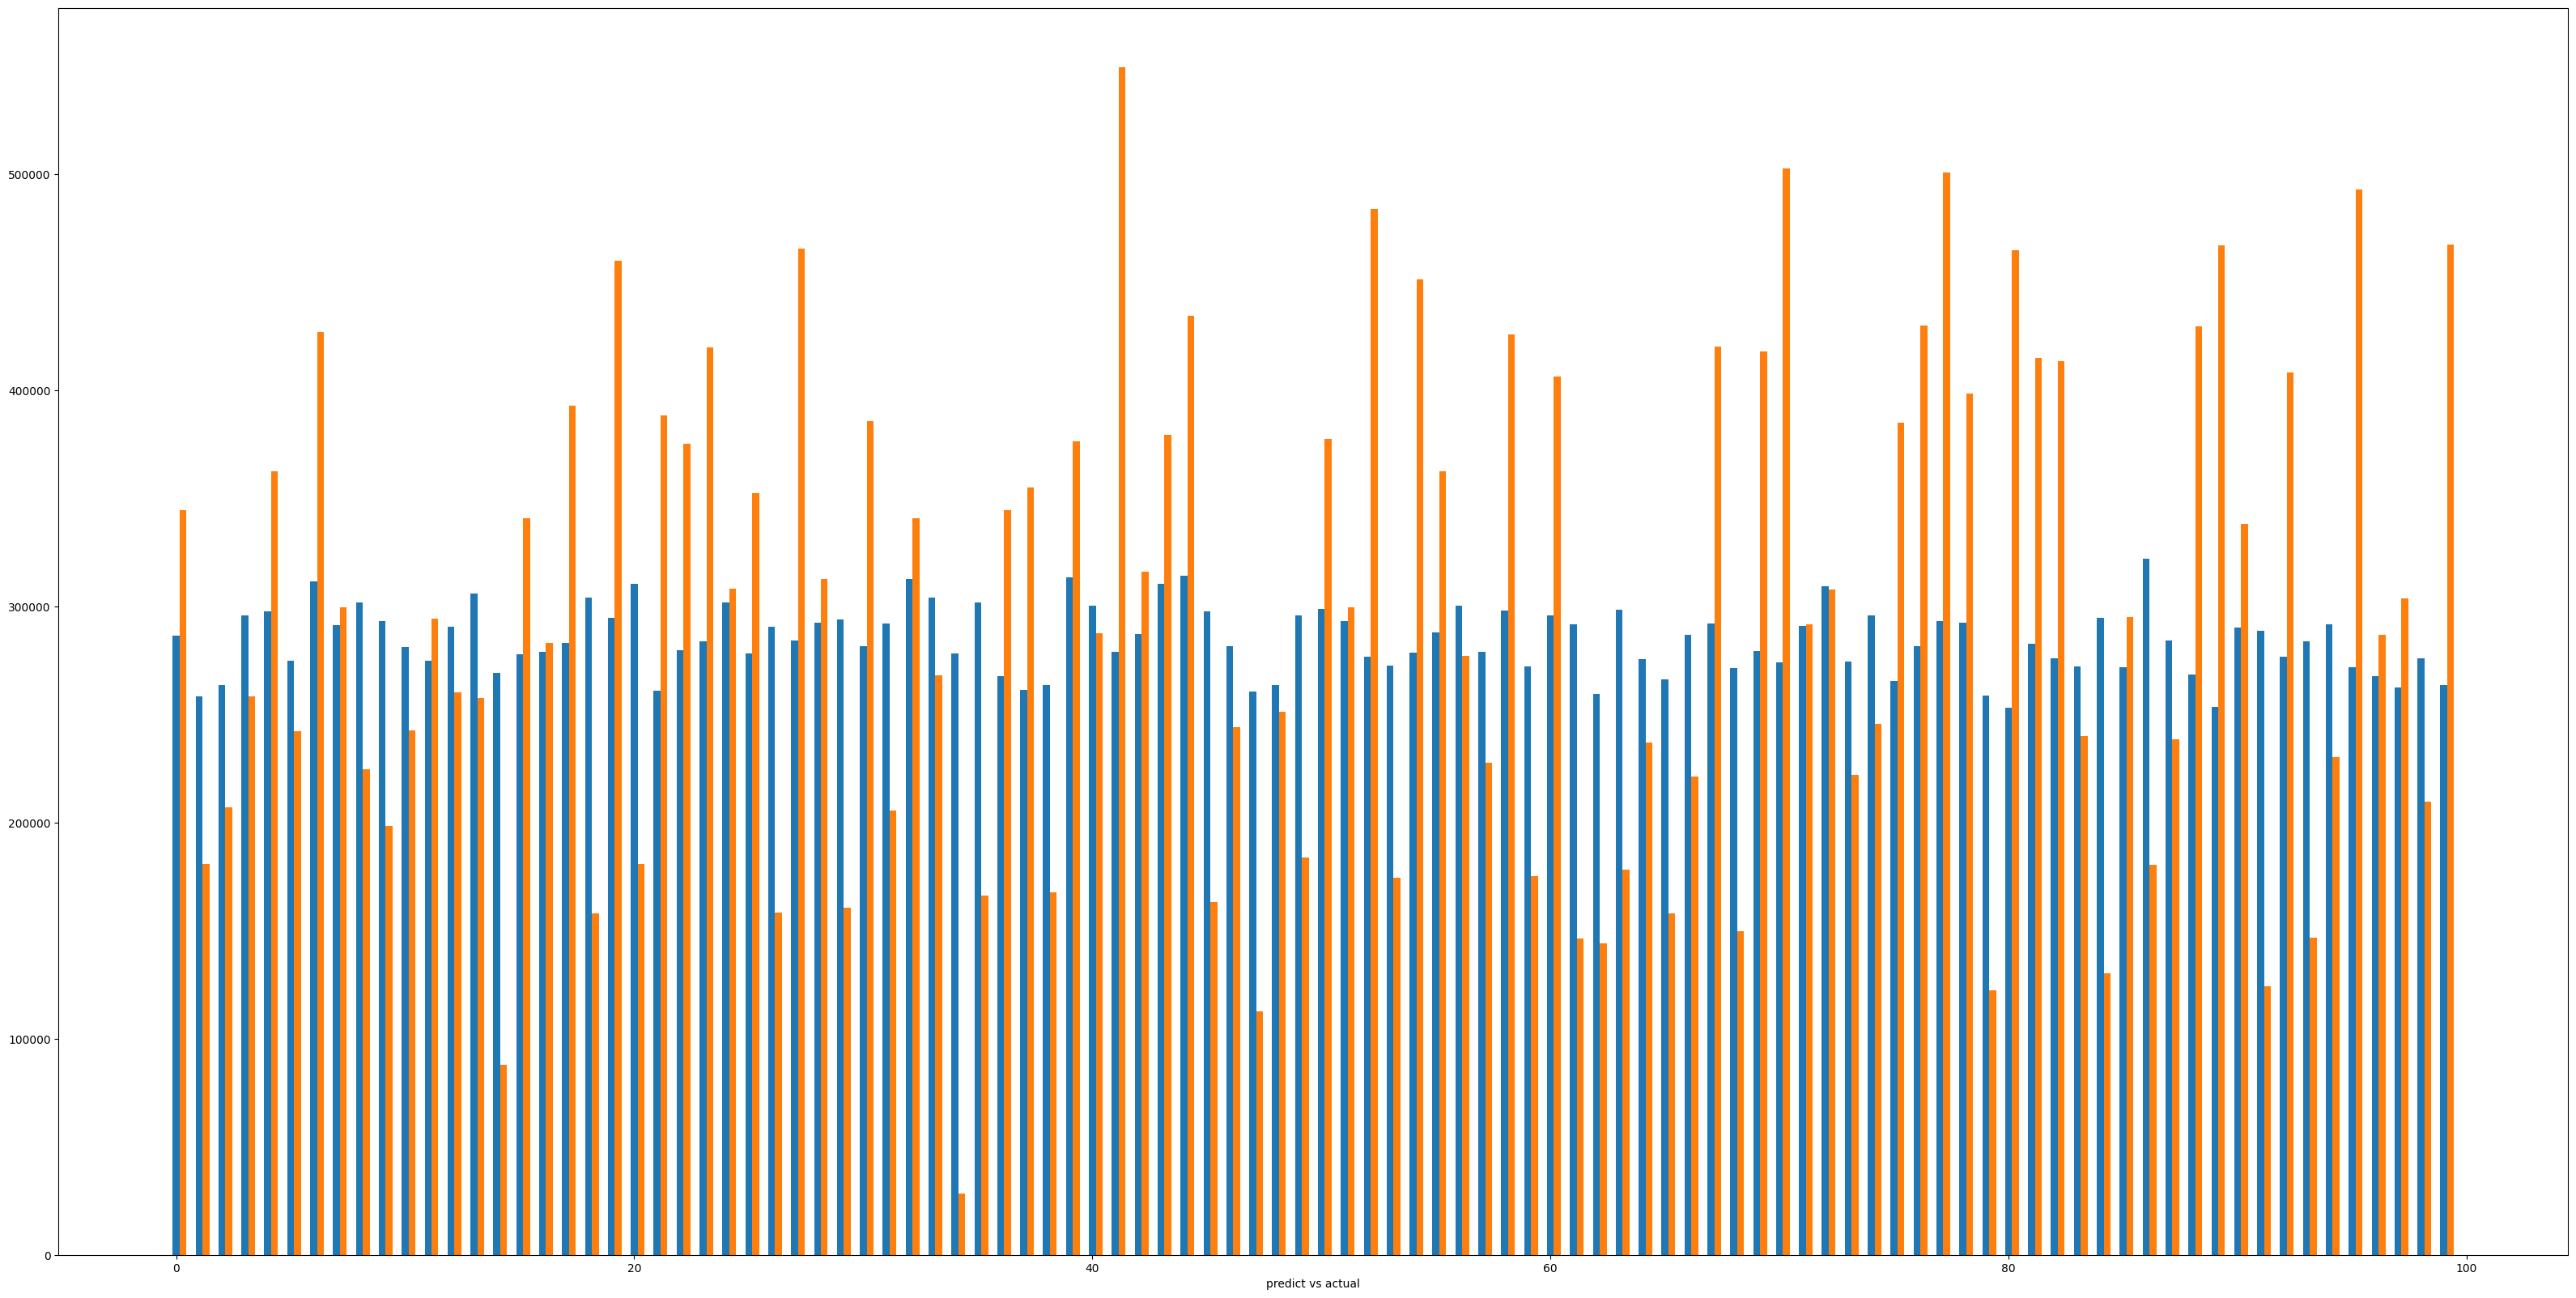

In [269]:
plt.figure(figsize=(40,20))
plt.xlabel('predict vs actual')
plt.bar(np.arange(100),ypred,0.3)
plt.bar(np.arange(100)+0.3,ytrue,0.3)